# Community Detection using divisive algorithm of Girvan and Newman

In [2]:
# import the required packges 
# network analysis package
import networkx as nx
# graphing/plotting package
import matplotlib.pyplot as plt
# python's numerical library 
import numpy as np

In [3]:
#Load the Karate Club Graph  (it is available in NetworkX)
G=nx.karate_club_graph()

In [4]:
# Load the list of two groups 
# Remember in networkx data node label starts from 0 and not 1
# The list of nodes can be found from Fig. 4 in the paper: 
# M. Girvan and M. E. J. Newman, Community structure in social 
# and biological networks PNAS vol. 99 no. 12 pp. 7821–7826 

Group1 = [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Group2 = [8,9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

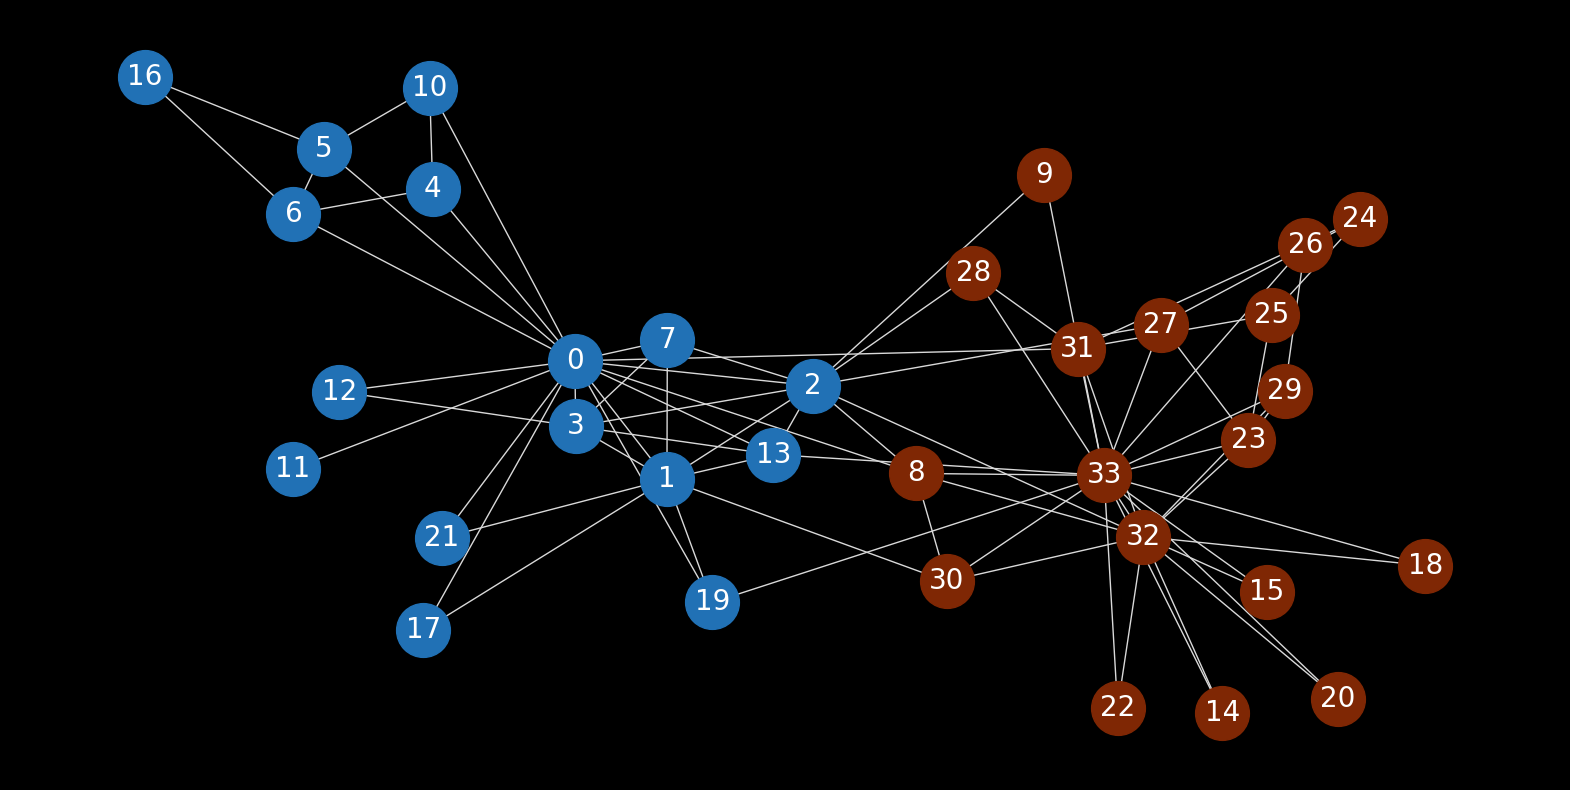

In [5]:
# Draw the network
plt.figure(figsize=(20,10),facecolor=(0, 0, 0))
# position for each node 
pos=nx.spring_layout(G)
nx.draw_networkx_edges(G, pos=pos,edge_color='#d9d9d9',width=1.0)
nx.draw_networkx_nodes(G,pos,nodelist=Group1,node_color='#2171b5',node_size=1500)
nx.draw_networkx_nodes(G,pos,nodelist=Group2,node_color='#7f2704',node_size=1500)
nx.draw_networkx_labels(G, pos=pos,font_size=20,font_weight="normal",font_color="white");
plt.axis('off');

In [6]:
# keep a copy of the graph for highlighting edges we remove 
G_1=G.copy(); 
# remove all the edges in this copy 
for edge in G_1.edges(): G_1.remove_edges_from([edge])

In [7]:
# Execute Girvan and Newman algo, (stopping when we have two components) 

while nx.number_connected_components(G) == 1:
    centrality = nx.edge_betweenness_centrality(G)
    ed1=max(centrality, key=centrality.get)
    G.remove_edge(*ed1)
    
    # G_1 will be used for highlighting edges we remove
    G_1.add_edge(*ed1)

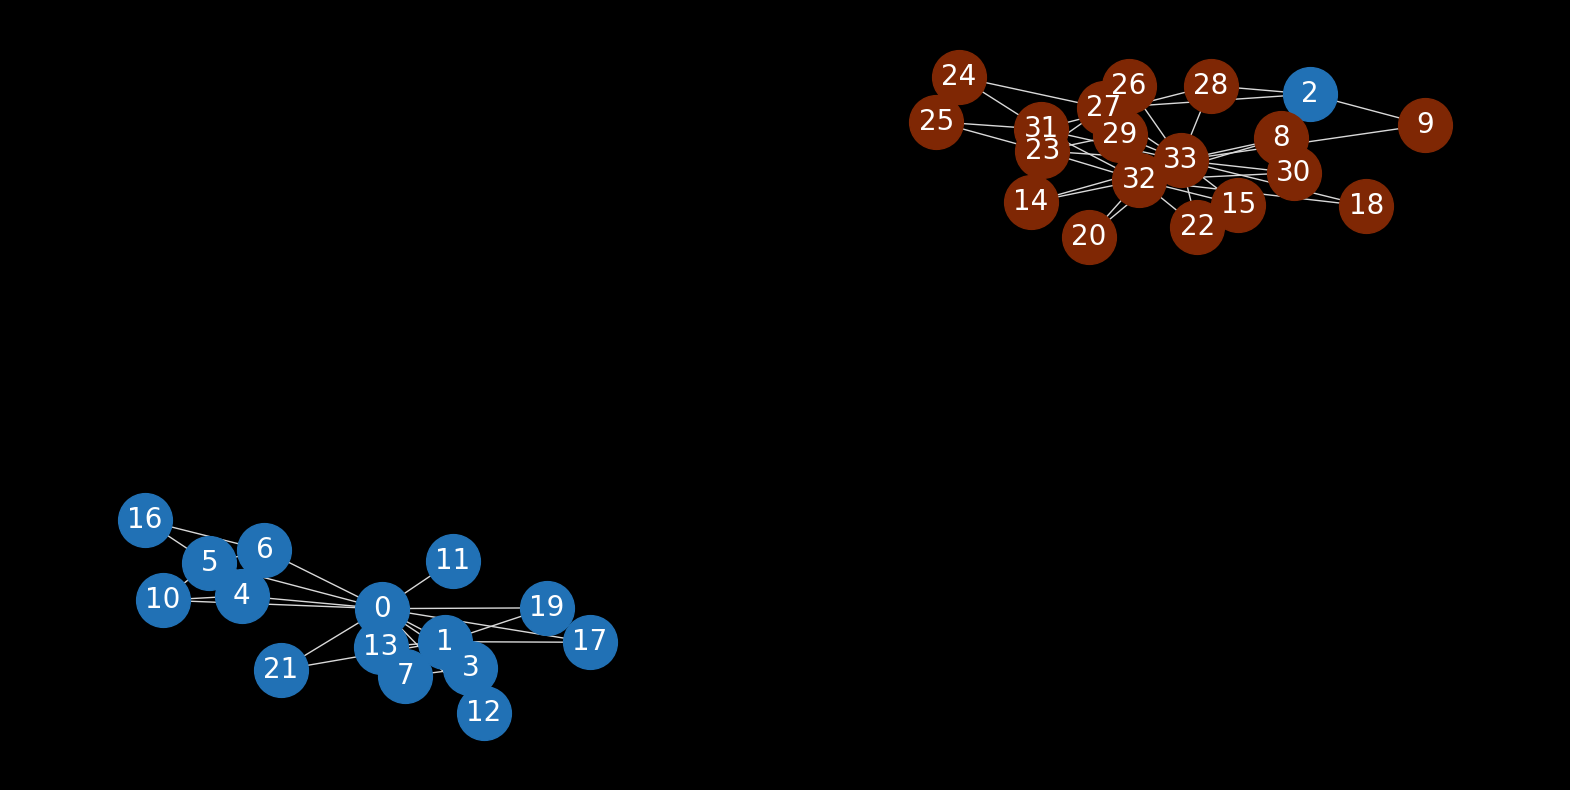

In [8]:
# Again draw the network
plt.figure(figsize=(20,10),facecolor=(0, 0, 0))
# New positions for each node 
pos=nx.spring_layout(G)
nx.draw_networkx_edges(G, pos=pos,edge_color='#d9d9d9',width=1.0)
nx.draw_networkx_nodes(G,pos,nodelist=Group1,node_color='#2171b5',node_size=1500)
nx.draw_networkx_nodes(G,pos,nodelist=Group2,node_color='#7f2704',node_size=1500)
nx.draw_networkx_labels(G, pos=pos,font_size=20,font_weight="normal",font_color="white");
plt.axis('off');

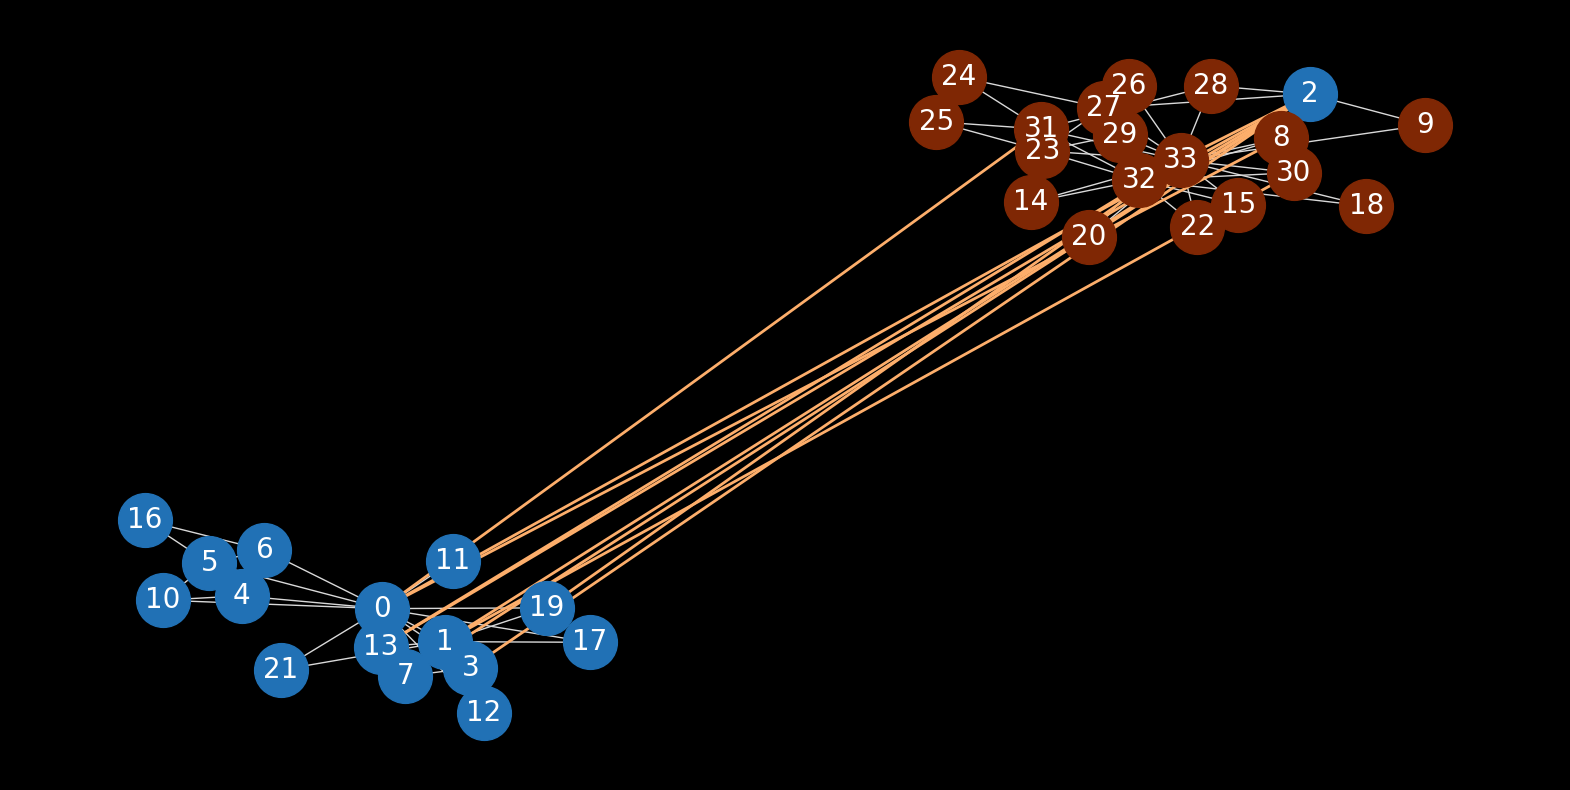

In [9]:
# Highlight edges removed 
plt.figure(figsize=(20,10),facecolor=(0, 0, 0))
nx.draw_networkx_edges(G, pos=pos,edge_color='#d9d9d9',width=1.0)
nx.draw_networkx_edges(G_1, pos=pos,edge_color='#fdae6b',width=2.0)
nx.draw_networkx_nodes(G,pos,nodelist=Group1,node_color='#2171b5',node_size=1500)
nx.draw_networkx_nodes(G,pos,nodelist=Group2,node_color='#7f2704',node_size=1500)
nx.draw_networkx_labels(G, pos=pos,font_size=20,font_weight="normal",font_color="white");
plt.axis('off');